In [0]:
import pandas as pd
import numpy as np
from keras import layers
from keras.layers import Input,Add, Dense, Activation,ZeroPadding2D,BatchNormalization, Flatten, Conv2D, AveragePooling2D,MaxPooling2D,GlobalMaxPooling2D
from keras.models import Model, load_model
import tensorflow as tf
from keras.initializers import glorot_uniform
import os
import cv2
from keras import regularizers
from google.colab import drive
#drive.mount('/content/drive')

In [0]:
def Cat_Dog(input_shape):
  X_input=Input(input_shape)
  X=ZeroPadding2D((3,3))(X_input)
  
  X=Conv2D(70,(8,8),strides=(1,1),padding='same',name='Conv0')(X)
  X=BatchNormalization(axis=3,name='batch0')(X)
  X=MaxPooling2D((5,5),(2,2),name='maxpool0')(X)
  X=Activation('relu')(X)
  
  X=Conv2D(40,(6,6),strides=(1,1),padding='same',name='Conv1')(X)
  X=BatchNormalization(axis=3,name='batch1')(X)
  X=MaxPooling2D((4,4),(2,2),name='maxpooling1')(X)
  
  X=Conv2D(30,(4,4),strides=(1,1),padding='same',name='Conv2')(X)
  X=BatchNormalization(axis=3,name='batch2')(X)
  X=MaxPooling2D((3,3),(2,2),name='maxpooling2')(X)
  
  X=Conv2D(10,(3,3),strides=(1,1),padding='same',name='Conv3')(X)
  X=BatchNormalization(axis=3,name='batch3')(X)
  X=MaxPooling2D((2,2),(2,2),name='maxpooling3')(X)

  X=Flatten()(X)
  X=Dense(2,activation='sigmoid',name='fc',kernel_regularizer=regularizers.l2(0.35))(X)
  model=Model(inputs=X_input,outputs=X,name='Cat_Dog')
  return model

In [0]:
from numpy import load

In [0]:
X=load('/content/drive/My Drive/Colab Notebooks/X.npy')

In [0]:
y=load('/content/drive/My Drive/Colab Notebooks/y.npy')

In [0]:
X_train=X[0:23000,:,:,:]
X_test=X[23000:,:,:]

In [27]:
y=np.eye(2)[y.reshape(-1)]
y.shape

(24946, 2)

In [0]:
y_train=y[0:23000,:]
y_test=y[23000:,:]

In [31]:
X_train.shape

(23000, 128, 128, 3)

In [32]:
X_test.shape

(1946, 128, 128, 3)

In [33]:
y_train.shape

(23000, 2)

In [34]:
y_test.shape

(1946, 2)

In [0]:
cat_dog=Cat_Dog(X_train.shape[1:])

In [0]:
cat_dog.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [103]:
cat_dog.fit(x=X_train,y=y_train,batch_size=64,epochs=60)

Epoch 1/60
23000/23000 [==============================] - 31s 1ms/step - loss: 0.7342 - acc: 0.7207
Epoch 2/60
23000/23000 [==============================] - 28s 1ms/step - loss: 0.4792 - acc: 0.8029
Epoch 3/60
23000/23000 [==============================] - 29s 1ms/step - loss: 0.4308 - acc: 0.8265
Epoch 4/60
23000/23000 [==============================] - 28s 1ms/step - loss: 0.4005 - acc: 0.8445
Epoch 5/60
23000/23000 [==============================] - 29s 1ms/step - loss: 0.3669 - acc: 0.8578
Epoch 6/60
23000/23000 [==============================] - 28s 1ms/step - loss: 0.3409 - acc: 0.8707
Epoch 7/60
23000/23000 [==============================] - 28s 1ms/step - loss: 0.3192 - acc: 0.8818
Epoch 8/60
23000/23000 [==============================] - 28s 1ms/step - loss: 0.2991 - acc: 0.8929
Epoch 9/60
23000/23000 [==============================] - 28s 1ms/step - loss: 0.2766 - acc: 0.9004
Epoch 10/60
23000/23000 [==============================] - 28s 1ms/step - loss: 0.2689 - acc: 0.9038

In [104]:
preds=cat_dog.evaluate(x=X_test,y=y_test)
print()
print("Loss"+str(preds[0]))
print('Test Accuracy'+str(preds[1]))

1946/1946 [==============================] - 2s 969us/step

Loss0.21938448117898524
Test Accuracy0.9244604316546763


In [106]:
cat_dog.summary()

Model: "Cat_Dog"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
zero_padding2d_18 (ZeroPaddi (None, 134, 134, 3)       0         
_________________________________________________________________
Conv0 (Conv2D)               (None, 134, 134, 70)      13510     
_________________________________________________________________
batch0 (BatchNormalization)  (None, 134, 134, 70)      280       
_________________________________________________________________
maxpool0 (MaxPooling2D)      (None, 65, 65, 70)        0         
_________________________________________________________________
activation_19 (Activation)   (None, 65, 65, 70)        0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 65, 65, 40)        1008

In [108]:
cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [0]:
img_size=128
img1=cv2.imread('1.jpg')
arr1=cv2.resize(img1,(img_size,img_size))
arr1=arr1.reshape(-1,arr1.shape[0],arr1.shape[1],arr1.shape[2])

In [172]:
arr1.shape

(1, 128, 128, 3)

[0]


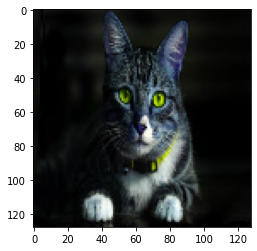

In [173]:
plt.imshow(arr1[0])
pred=cat_dog.predict(arr1)
predict_class = np.argmax(pred, axis=1)
print(predict_class)

In [0]:
img2=cv2.imread('3.jpg')
arr2=cv2.resize(img2,(img_size,img_size))
arr2=arr2.reshape(-1,arr2.shape[0],arr2.shape[1],arr2.shape[2])

[1]


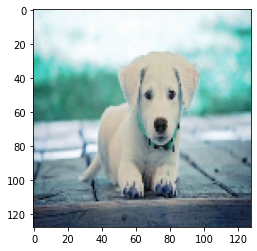

In [168]:
plt.imshow(arr2[0])
pred=cat_dog.predict(arr2)
predict_class = np.argmax(pred, axis=1)
print(predict_class)

In [0]:
cat_dog.save('cat_dog.h5')

In [0]:
cat_dog.save_weights('cat_dog_weights.h5')